# Tweet Classification

Dataset and Problem Url:<br>
https://www.hackerearth.com/challenges/competitive/hackerearth-machine-learning-challenge-mothers-day/

References:<br>
https://github.com/gauravbansal98/Sentiment-classification-on-news-of-disaster-on-social-media-02-06-2018
https://medium.com/vickdata/detecting-hate-speech-in-tweets-natural-language-processing-in-python-for-beginners-4e591952223
        
F1_score on test set = 0.7449843731656722<br>
F1_scoe on validation set i.e submission data = 0.3680903

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm   # can be used for showing progress bar for any iteration

import random
import time
import re
import codecs

#Natural Language Toolkit
import nltk
# nltk.download()

from nltk.tokenize import word_tokenize

PATH = os.getcwd()

for dirname, _,filenames in os.walk(PATH):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/mnt/8CFE7DA1FE7D846C/Practice/Git/Active/Machine_Learning_Projects/Mothers’_Day_with_Machine_Learning/idsMatrix.npy
/mnt/8CFE7DA1FE7D846C/Practice/Git/Active/Machine_Learning_Projects/Mothers’_Day_with_Machine_Learning/Notebook(Complete-1).ipynb
/mnt/8CFE7DA1FE7D846C/Practice/Git/Active/Machine_Learning_Projects/Mothers’_Day_with_Machine_Learning/Notebook(Not_Complete-1).ipynb
/mnt/8CFE7DA1FE7D846C/Practice/Git/Active/Machine_Learning_Projects/Mothers’_Day_with_Machine_Learning/Notebook(Not_Complete-2).ipynb
/mnt/8CFE7DA1FE7D846C/Practice/Git/Active/Machine_Learning_Projects/Mothers’_Day_with_Machine_Learning/test_tweet.csv
/mnt/8CFE7DA1FE7D846C/Practice/Git/Active/Machine_Learning_Projects/Mothers’_Day_with_Machine_Learning/train_tweet.csv
/mnt/8CFE7DA1FE7D846C/Practice/Git/Active/Machine_Learning_Projects/Mothers’_Day_with_Machine_Learning/.ipynb_checkpoints/Notebook(Complete-1)-checkpoint.ipynb
/mnt/8CFE7DA1FE7D846C/Practice/Git/Active/Machine_Learning_Projects/Mothers’_Day_with_Ma

In [2]:
#Loading CSV Training Data

train_data = pd.read_csv('./dataset/train.csv')
train_data = train_data[['original_text', 'sentiment_class']]
print(train_data.head())

#Loading CSV Test Data

test_data = pd.read_csv("./dataset/test.csv")
test_data = test_data[['id', 'original_text']]
print(test_data.head())

                                       original_text  sentiment_class
0  Happy #MothersDay to all you amazing mothers o...                0
1  Happy Mothers Day Mum - I'm sorry I can't be t...                0
2  Happy mothers day To all This doing a mothers ...               -1
3  Happy mothers day to this beautiful woman...ro...                0
4  Remembering the 3 most amazing ladies who made...               -1
             id                                      original_text
0  1.246628e+18  3. Yeah, I once cooked potatoes when I was 3 y...
1  1.245898e+18  Happy Mother's Day to all the mums, step-mums,...
2  1.244717e+18  I love the people from the UK, however, when I...
3  1.245730e+18  Happy 81st Birthday Happy Mother’s Day to my m...
4  1.244636e+18  Happy Mothers day to all those wonderful mothe...


In [3]:
#Standardizing text in the tweet, removing all types of sybmbols from the tweets

def standardize_tweets(tweet, text_field):
    tweet[text_field] = tweet[text_field].str.replace(r"http\S+", "")
    tweet[text_field] = tweet[text_field].str.replace(r'http','')
    tweet[text_field] = tweet[text_field].str.replace(r'!','')
    tweet[text_field] = tweet[text_field].str.replace(r'@S\+','')
    tweet[text_field] = tweet[text_field].str.replace(r'[^A-Za-z0-9(),!?@\'\`\"\_\n]',' ')
    tweet[text_field] = tweet[text_field].str.replace(r'@','at')
    tweet[text_field] = tweet[text_field].str.lower()
    return tweet
   
    
train_data = standardize_tweets(train_data, "original_text")
train_data.to_csv("train_tweet.csv")

test_data = standardize_tweets(test_data, "original_text")
test_data.to_csv("test_tweet.csv")

train_data.head()

,original_text,sentiment_class
0,happy mothersday to all you amazing mothers o...,0
1,happy mothers day mum i'm sorry i can't be t...,0
2,happy mothers day to all this doing a mothers ...,-1
3,happy mothers day to this beautiful woman ro...,0
4,remembering the 3 most amazing ladies who made...,-1


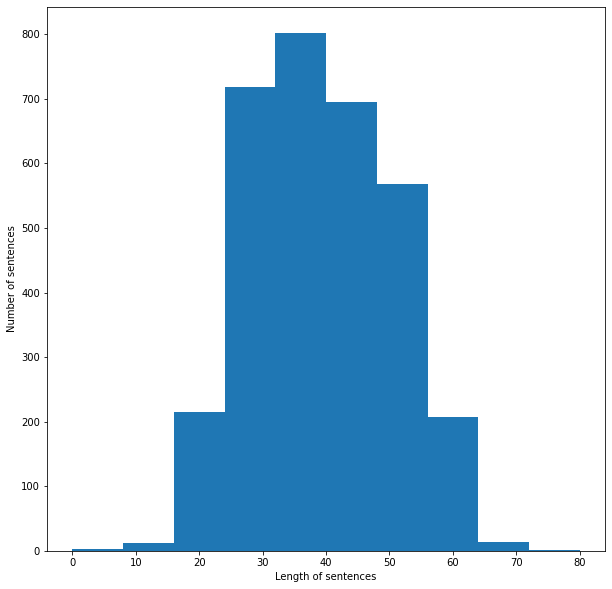

Average length of a sentence:  38.76259659969088


In [4]:
def plot_length_sentences():
    file = train_data
    tweets = file['original_text']
    sentences_length = []
    for line in tweets:
        words = word_tokenize(line)
        sentences_length.append(len(words))
        
    fig = plt.figure(figsize = (10, 10))
    plt.xlabel('Length of sentences')
    plt.ylabel('Number of sentences')
    plt.hist(sentences_length, range=(0, 80))
    plt.show()
    
    return sentences_length

sentences_length = plot_length_sentences()
print('Average length of a sentence: ',sum(sentences_length)/len(train_data['original_text']))

# Based on

https://medium.com/vickdata/detecting-hate-speech-in-tweets-natural-language-processing-in-python-for-beginners-4e591952223

In [5]:
train_data.groupby('sentiment_class').count()

,original_text
sentiment_class,
-1,769
0,1701
1,765


# Handling imbalanced classes

There are a number of methods you can use to handle this. One approach is to use either upsampling or downsampling. In the case of upsampling we use a function that repeatedly takes samples, with replacement, from the minority class until the class is the same size as the majority. With replacement means that the same sample can be used multiple times.

When downsampling we use the same function to take samples from the majority class, without replacement, until it is the same size of the minority class. Without replacement means that each sample is only sampled once.

In [6]:
# Handles imbalanced class, repeating the classes whose 
# counts are lower so that to make each class coun same

from sklearn.utils import resample

train_majority = train_data[train_data.sentiment_class==0]
train_minority1 = train_data[train_data.sentiment_class==1]
train_minority2 = train_data[train_data.sentiment_class== -1]

train_minority1_upsampled = resample(train_minority1, replace=True, n_samples=len(train_majority), random_state=123)
train_minority2_upsampled = resample(train_minority2, replace=True, n_samples=len(train_majority), random_state=123)

train_upsampled = pd.concat([train_minority1_upsampled, train_minority2_upsampled, train_majority], axis=0)
train_upsampled.groupby('sentiment_class').count()

,original_text
sentiment_class,
-1,1701
0,1701
1,1701


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier

pipeline_sgd = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('nb', SGDClassifier()),
])

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_upsampled['original_text'], train_upsampled['sentiment_class'], test_size=0.2, shuffle=True, random_state=0)

In [9]:
from sklearn.metrics import f1_score

model = pipeline_sgd.fit(X_train, y_train)
y_predict = model.predict(X_test)

f1_score(y_test, y_predict, average='macro')

0.7489264016219526

# Here on Processing data for Submission

In [21]:
X_submission = test_data['original_text']
y_submission = model.predict(X_submission)

In [11]:
arr = np.array(y_submission)
df = pd.DataFrame(data=arr.flatten())

df.head()

,0
0,1
1,0
2,-1
3,0
4,-1


In [12]:
submission = pd.concat([test_data['id'], df], axis=1)

In [13]:
submission.columns = ['id', 'sentiment_class']
submission.head()

,id,sentiment_class
0,1.246628e+18,1
1,1.245898e+18,0
2,1.244717e+18,-1
3,1.245730e+18,0
4,1.244636e+18,-1


In [14]:
submission.to_csv('./dataset/Submission.csv', index=False)